In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from logistic_regression import MultinomialLogisticRegression
from preprocess import Preprocess
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
raw_train_data = "../data/train.csv"
raw_test_data = "../data/test.csv"

In [3]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_train_data)

train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])
np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_data, test_size=0.33#, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'month', 'Label'],
      dtype='object')


In [4]:
X_train

array([[ 1.17023663,  0.20097484,  0.31264735, ...,  0.83365928,
         0.83502721,  0.87014244],
       [ 1.15999266,  0.18576436, -0.17012304, ..., -1.00192114,
         0.0415953 , -1.7854207 ],
       [-1.19612069,  2.06425976, -1.38622515, ..., -2.21369464,
        -1.7719138 , -0.26795605],
       ...,
       [-0.96050935, -0.65841779, -1.315159  , ...,  0.24493455,
        -1.09001454,  0.11141011],
       [ 1.17023663,  0.20097484,  0.53255638, ...,  0.45748915,
         0.35511203,  1.2495086 ],
       [ 0.71950191, -0.40744472,  0.38802666, ...,  0.81106211,
         0.72945872, -0.64732222]])

In [5]:
train_df.Label.value_counts(normalize=True)

0    0.785947
2    0.173280
1    0.040773
Name: Label, dtype: float64

In [6]:
len(train_df)

44760

### Training model

In [7]:
regularizers = np.array([0.001, 0.01, 0.05, 0.1])
learning_rates = np.array([0.01, 0.1])

params_combination = np.array(
    np.meshgrid(regularizers, learning_rates)
).T.reshape(-1, 2)

valid_errors = []
valid_errors_idx = []

for reg, l_rate in params_combination:
    model = MultinomialLogisticRegression(learning_rate=l_rate, num_iterations=500, regularizer=reg)
    model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)
    
    min_error_idx = np.argmin(model.valid_errors)
    valid_errors_idx.append(min_error_idx)
    
    min_error = np.min(model.valid_errors)
    valid_errors.append(min_error)

Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.9979980945129286
Epoch 200, cross entropy loss: 0.9635803289884033
Epoch 300, cross entropy loss: 0.9365615691487986
Epoch 400, cross entropy loss: 0.9132114743152208
Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.8244940761779028
Epoch 200, cross entropy loss: 0.7730855580500634
Epoch 300, cross entropy loss: 0.7525173886502735
Epoch 400, cross entropy loss: 0.7400275769988041
Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.9982493177849654
Epoch 200, cross entropy loss: 0.9641475079905487
Epoch 300, cross entropy loss: 0.9374402365614247
Epoch 400, cross entropy loss: 0.9143848725996248
Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.827093448533769
Epoch 200, cross entropy loss: 0.77722020686529
Epoch 300, cross entropy loss: 0.7578096210745404
Epoch 400, cross entropy loss: 0.7463576891129088
Epoch 0, cr

In [8]:
(valid_errors)

[0.8918037249915778,
 0.7298191024045938,
 0.8932291710906684,
 0.7370473605112506,
 0.8995644870866264,
 0.769172952096392,
 0.9074836320815739,
 0.8075484212059503]

In [9]:
valid_errors_idx

[49, 49, 49, 49, 49, 49, 49, 37]

In [10]:
opt_params = params_combination[np.argmin(valid_errors)]
opt_params

array([0.001, 0.1  ])

In [11]:
ite = valid_errors_idx[np.argmin(valid_errors)]
ite

49

In [12]:
model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=1000, regularizer=opt_params[1])
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.8530871720924288
Epoch 200, cross entropy loss: 0.8185666950175566
Epoch 300, cross entropy loss: 0.8107319453172063
Epoch 400, cross entropy loss: 0.8096588102539561
Epoch 500, cross entropy loss: 0.8116154640604673
Epoch 600, cross entropy loss: 0.8153785365220192
Epoch 700, cross entropy loss: 0.8203258507363891
Epoch 800, cross entropy loss: 0.8260848782646829
Epoch 900, cross entropy loss: 0.8324238180589989
Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'month', 'Label'],
      dtype='object')
Confusion Matrix:
[[9936  492 1150]
 [ 324  297    0]
 [1021   46 1505]] 

Accuracy:
0.7947 

Precision:
0.6011 

Recall:
0.6405 

F1 Score:
0.6202


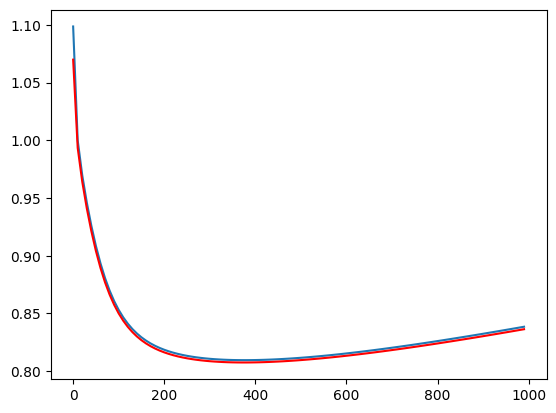

In [13]:
plt.plot(
    model.iters,
    model.train_errors
)

plt.plot(
    model.iters,
    model.valid_errors,
    color='r'
)

In [14]:
model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=np.argmin(model.valid_errors)*10, regularizer=opt_params[1])
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.8530871720924288
Epoch 200, cross entropy loss: 0.8185666950175566
Epoch 300, cross entropy loss: 0.8107319453172063
Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'month', 'Label'],
      dtype='object')
Confusion Matrix:
[[9485  692 1401]
 [ 276  336    9]
 [ 853   66 1653]] 

Accuracy:
0.7768 

Precision:
0.5801 

Recall:
0.6677 

F1 Score:
0.6208


In [18]:
weights = pd.DataFrame(model.weights, index=['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT', 'month'], columns=[0,1,2])
weights.abs().sort_values(by=[0,2], ascending=False)

,0,1,2
lat,0.520986,0.231896,0.752883
TS,0.434522,0.079763,0.354759
Z1000,0.339965,0.387994,0.048029
U850,0.326092,0.159444,0.485536
PS,0.324855,0.287695,0.037159
PSL,0.324550,0.300846,0.023703
TMQ,0.319955,0.033876,0.286079
Z200,0.130626,0.087646,0.218272
lon,0.117573,0.114903,0.232475
T500,0.106594,0.050053,0.156647


In [22]:
weights.abs().sort_values(by=[0,2], ascending=False)[:-8].index

Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'UBOT'],
      dtype='object')

In [23]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_train_data)

train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])

cols = ['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'UBOT', "Label"] 

train_df = train_df[cols]

np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_df.to_numpy(), test_size=0.33 #, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'UBOT', 'Label'],
      dtype='object')


In [33]:
model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=400, regularizer=opt_params[1])
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.7607495809872818
Epoch 200, cross entropy loss: 0.7310887297818537
Epoch 300, cross entropy loss: 0.7282165811462648
Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'UBOT', 'Label'],
      dtype='object')
Confusion Matrix:
[[10267   245  1117]
 [  345   227     6]
 [ 1120    15  1429]] 

Accuracy:
0.8072 

Precision:
0.6337 

Recall:
0.611 

F1 Score:
0.6221


0.767 - submission

Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'Label'],
      dtype='object')
Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.7604864365664811
Epoch 200, cross entropy loss: 0.7449606033332898
Epoch 300, cross entropy loss: 0.7408726757678747
Epoch 400, cross entropy loss: 0.7398550647397804
Epoch 500, cross entropy loss: 0.7407586767168708
Epoch 600, cross entropy loss: 0.7429022158740011
Epoch 700, cross entropy loss: 0.7458515636114263
Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'Label'],
      dtype='object')
Confusion Matrix:
[[10247   227  1155]
 [  340   228    10]
 [ 1100    11  1453]] 

Accuracy:
0.8075 

Precision:
0.6404 

Recall:
0.6141 

F1 Score:
0.627


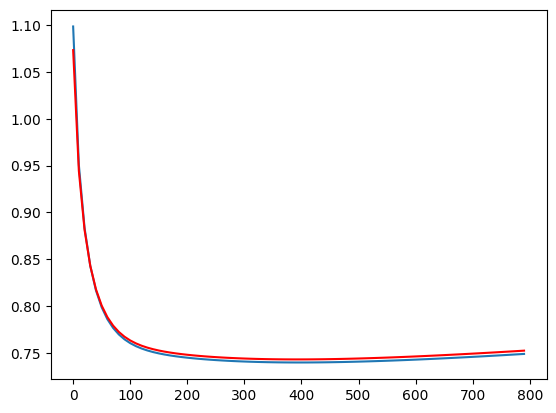

In [19]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_train_data)

train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])

cols = ['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
        "Label"] 

train_df = train_df[cols]

np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_df.to_numpy(), test_size=0.33 #, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=800, regularizer=opt_params[1])
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

plt.plot(
    model.iters,
    model.train_errors
)

plt.plot(
    model.iters,
    model.valid_errors,
    color='r'
)

Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'Label'], dtype='object')
Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.7748450919470984
Epoch 200, cross entropy loss: 0.7575519612712298
Epoch 300, cross entropy loss: 0.7541254825834721
Epoch 400, cross entropy loss: 0.754772413455527
Epoch 500, cross entropy loss: 0.756944676099407
Epoch 600, cross entropy loss: 0.7596972822983298
Epoch 700, cross entropy loss: 0.7627046741085174
Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'Label'], dtype='object')
Confusion Matrix:
[[9582  211 1836]
 [ 322  215   41]
 [ 864    5 1695]] 

Accuracy:
0.778 

Precision:
0.6211 

Recall:
0.619 

F1 Score:
0.62


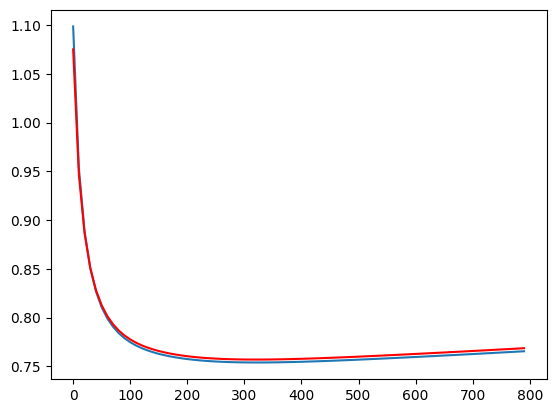

In [46]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_train_data)

train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])

cols = ['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', "Label"] 

train_df = train_df[cols]

np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_df.to_numpy(), test_size=0.33 #, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=800, regularizer=opt_params[1])
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

plt.plot(
    model.iters,
    model.train_errors
)

plt.plot(
    model.iters,
    model.valid_errors,
    color='r'
)

Ok, parece que tá piorando, vou começar a colocar mais cols

Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'UBOT', 'PRECT', 'Label'],
      dtype='object')
Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.804455297549811
Epoch 200, cross entropy loss: 0.7680602269014156
Epoch 300, cross entropy loss: 0.758267855910545
Epoch 400, cross entropy loss: 0.7553829890883004
Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'UBOT', 'PRECT', 'Label'],
      dtype='object')
Confusion Matrix:
[[10124   291  1214]
 [  324   249     5]
 [ 1053    19  1492]] 

Accuracy:
0.8033 

Precision:
0.6254 

Recall:
0.6278 

F1 Score:
0.6266


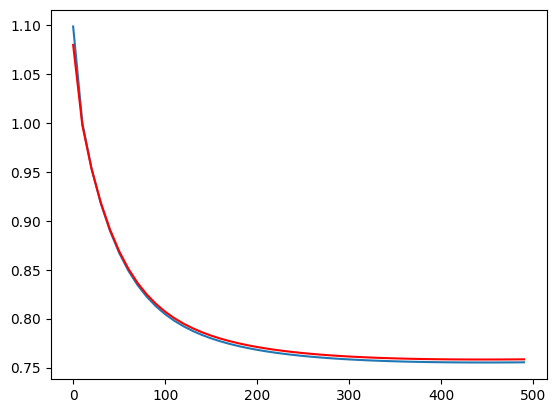

In [50]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_train_data)

train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])

cols = ['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'UBOT', 'PRECT', "Label"] 

train_df = train_df[cols]

np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_df.to_numpy(), test_size=0.33 #, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=500, regularizer=opt_params[1])
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

plt.plot(
    model.iters,
    model.train_errors
)

plt.plot(
    model.iters,
    model.valid_errors,
    color='r'
)

Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'UBOT', 'PRECT', 'QREFHT', 'Label'],
      dtype='object')
Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.8040514193711443
Epoch 200, cross entropy loss: 0.7656176411978275
Epoch 300, cross entropy loss: 0.7551086930035138
Epoch 400, cross entropy loss: 0.7521321165868762
Epoch 500, cross entropy loss: 0.7521190023047649
Epoch 600, cross entropy loss: 0.7536814049671082
Epoch 700, cross entropy loss: 0.7562596587277299
Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'UBOT', 'PRECT', 'QREFHT', 'Label'],
      dtype='object')
Confusion Matrix:
[[10272   248  1109]
 [  328   247     3]
 [ 1105    18  1441]] 

Accuracy:
0.8097 

Precision:
0.6412 

Recall:
0.6242 

F1 Score:
0.6326


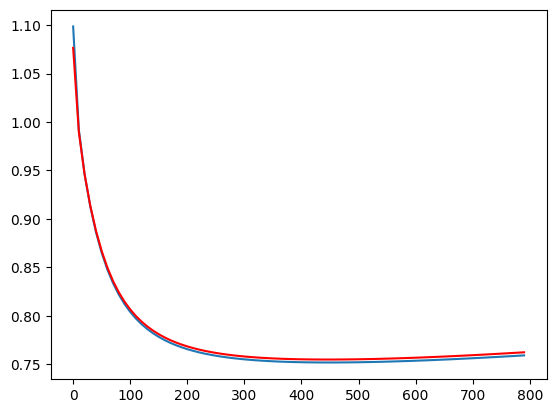

In [19]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_train_data)

train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])

cols = ['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'UBOT', 'PRECT', 'QREFHT', "Label"] 

train_df = train_df[cols]

np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_df.to_numpy(), test_size=0.33 #, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=800, regularizer=0.1)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

plt.plot(
    model.iters,
    model.train_errors
)

plt.plot(
    model.iters,
    model.valid_errors,
    color='r'
)

Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'UBOT', 'PRECT', 'QREFHT', 'VBOT', 'Label'],
      dtype='object')
Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.8267273415657584
Epoch 200, cross entropy loss: 0.7840647004392649
Epoch 300, cross entropy loss: 0.7744000586901266
Epoch 400, cross entropy loss: 0.7723949364373108
Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'UBOT', 'PRECT', 'QREFHT', 'VBOT', 'Label'],
      dtype='object')
Confusion Matrix:
[[9967  433 1229]
 [ 293  284    1]
 [ 990   53 1521]] 

Accuracy:
0.797 

Precision:
0.6026 

Recall:
0.6472 

F1 Score:
0.6241


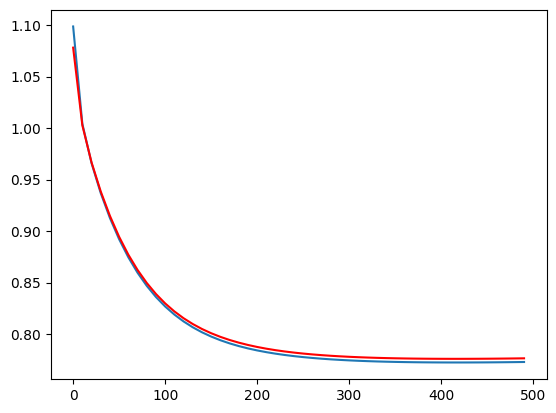

In [52]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_train_data)

train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])

cols = ['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'UBOT', 'PRECT', 'QREFHT', 'VBOT', "Label"] 

train_df = train_df[cols]

np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_df.to_numpy(), test_size=0.33 #, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=500, regularizer=opt_params[1])
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

plt.plot(
    model.iters,
    model.train_errors
)

plt.plot(
    model.iters,
    model.valid_errors,
    color='r'
)

começou a piorar... vou deixar o melhor aqui embaixo:

Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'Label'],
      dtype='object')
Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.7604864365664811
Epoch 200, cross entropy loss: 0.7449606033332898
Epoch 300, cross entropy loss: 0.7408726757678747
Epoch 400, cross entropy loss: 0.7398550647397804
Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'Label'],
      dtype='object')
Confusion Matrix:
[[10146   242  1241]
 [  341   224    13]
 [ 1048    11  1505]] 

Accuracy:
0.8039 

Precision:
0.6316 

Recall:
0.6157 

F1 Score:
0.6235


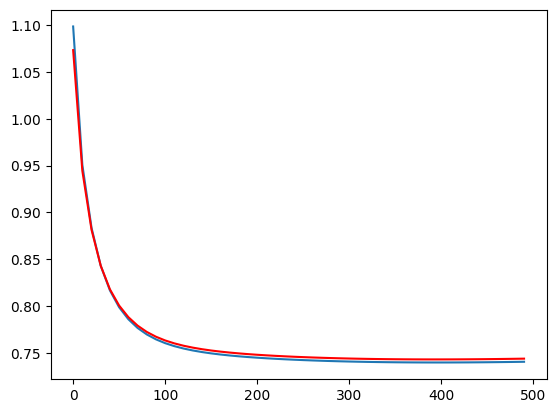

In [54]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_train_data)

train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])

cols = ['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
        "Label"] 

train_df = train_df[cols]

np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_df.to_numpy(), test_size=0.33 #, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=500, regularizer=opt_params[1])
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

plt.plot(
    model.iters,
    model.train_errors
)

plt.plot(
    model.iters,
    model.valid_errors,
    color='r'
)

Tentando algumas combinações não lineares

/var/folders/hw/4hw4rbpn1h3fl_fsrpw80hd80000gn/T/ipykernel_95710/4181548979.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_tmp[f"{col1}*{col2}"] = train_df[col2] * train_df[col1]
/var/folders/hw/4hw4rbpn1h3fl_fsrpw80hd80000gn/T/ipykernel_95710/4181548979.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_tmp[f"{col1}*{col2}"] = train_df[col2] * train_df[col1]
/var/folders/hw/4hw4rbpn1h3fl_fsrpw80hd80000gn/T/ipykernel_95710/4181548979.py:14: SettingWithCopyWarning: 
A value is trying to b

Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'month', 'Label'],
      dtype='object')
Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.8783541169080953
Epoch 200, cross entropy loss: 0.8112513169840527
Epoch 300, cross entropy loss: 0.7860893528866358
Epoch 400, cross entropy loss: 0.7809921557326719
Epoch 500, cross entropy loss: 0.785620097968487
Epoch 600, cross entropy loss: 0.7947613562395061
Epoch 700, cross entropy loss: 0.8057038897471528
Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'month', 'Label'],
      dtype='object')
Confusion Matrix:
[[9656  667 1306]
 [ 222  349    7]
 [ 957   75 1532]] 

Accuracy:
0.7811 

Precision:
0.5832 

Recall:
0.6772 

F1 Score:
0.6267


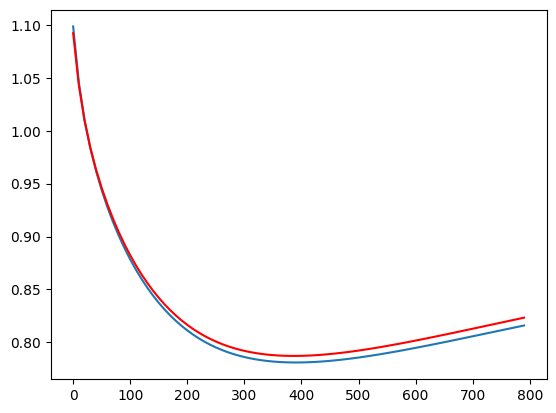

In [12]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_train_data)

train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])

train_tmp = train_df.drop("Label", axis=1)
cols = ['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500'] 
train_tmp = train_df[cols]

cols_imp = ['lat', 'TS', 'Z1000', 'U850']

for col1 in cols_imp:
    for col2 in cols_imp:
        train_tmp[f"{col1}*{col2}"] = train_df[col2] * train_df[col1]

train_tmp["Label"] = train_df["Label"]

np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_tmp.to_numpy(), test_size=0.33 #, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

model = MultinomialLogisticRegression(learning_rate=0.01, num_iterations=800, regularizer=0.1)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

plt.plot(
    model.iters,
    model.train_errors
)

plt.plot(
    model.iters,
    model.valid_errors,
    color='r'
)

Não rolou também 

Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'Label'],
      dtype='object')
Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.7604864365664811
Epoch 200, cross entropy loss: 0.7449606033332898
Epoch 300, cross entropy loss: 0.7408726757678747
Epoch 400, cross entropy loss: 0.7398550647397804
Epoch 500, cross entropy loss: 0.7407586767168708
Epoch 600, cross entropy loss: 0.7429022158740011
Epoch 700, cross entropy loss: 0.7458515636114263
Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'Label'],
      dtype='object')
Confusion Matrix:
[[10247   227  1155]
 [  340   228    10]
 [ 1100    11  1453]] 

Accuracy:
0.8075 

Precision:
0.6404 

Recall:
0.6141 

F1 Score:
0.627


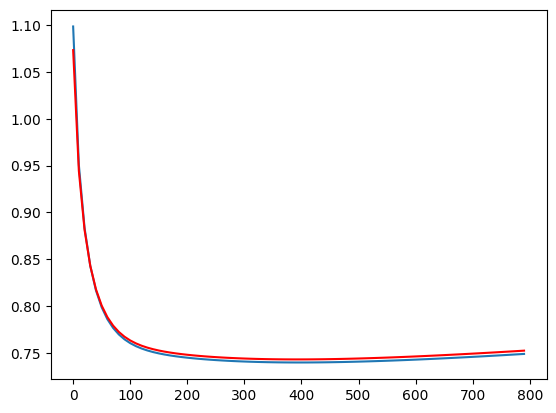

In [14]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_train_data)

train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])

cols = ['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
        "Label"] 

train_df = train_df[cols]

np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_df.to_numpy(), test_size=0.33 #, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=800, regularizer=0.1)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

plt.plot(
    model.iters,
    model.train_errors
)

plt.plot(
    model.iters,
    model.valid_errors,
    color='r'
)

Tirando um ALEATORIO

Index(['lat', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'Label'],
      dtype='object')
Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.8276903898731006
Epoch 200, cross entropy loss: 0.8204062311521209
Epoch 300, cross entropy loss: 0.8187493674548106
Epoch 400, cross entropy loss: 0.8177596590785982
Epoch 500, cross entropy loss: 0.8177934914124132
Epoch 600, cross entropy loss: 0.8187099343998343
Epoch 700, cross entropy loss: 0.8202872424694188
Index(['lat', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'Label'],
      dtype='object')
Confusion Matrix:
[[8972  294 2363]
 [ 335  182   61]
 [ 696    8 1860]] 

Accuracy:
0.7457 

Precision:
0.569 

Recall:
0.6039 

F1 Score:
0.586


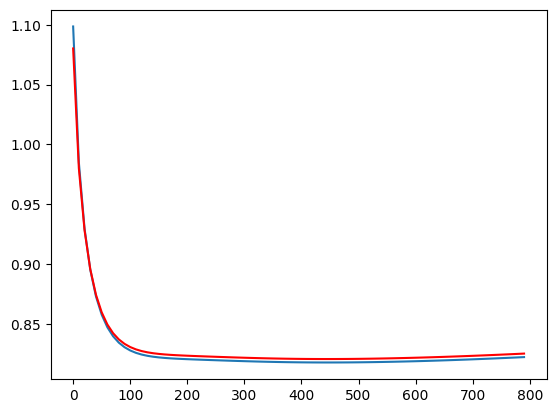

In [17]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_train_data)

train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])

cols = ['lat', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
        "Label"] 

train_df = train_df[cols]

np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_df.to_numpy(), test_size=0.33 #, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=800, regularizer=0.1)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

plt.plot(
    model.iters,
    model.train_errors
)

plt.plot(
    model.iters,
    model.valid_errors,
    color='r'
)

É, ficou ruim

---
melhor modelo

Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'UBOT', 'PRECT', 'QREFHT', 'Label'],
      dtype='object')
Epoch 0, cross entropy loss: 1.0986122886681093
Epoch 100, cross entropy loss: 0.7901766866898843
Epoch 200, cross entropy loss: 0.7502195656418431
Epoch 300, cross entropy loss: 0.7398312137284624
Epoch 400, cross entropy loss: 0.7374666378561038
Epoch 500, cross entropy loss: 0.7382697217883099
Epoch 600, cross entropy loss: 0.7407087875528959
Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'UBOT', 'PRECT', 'QREFHT', 'Label'],
      dtype='object')
Confusion Matrix:
[[15701   336  1561]
 [  541   347     3]
 [ 1736    22  2133]] 

Accuracy:
0.8124 

Precision:
0.6475 

Recall:
0.6099 

F1 Score:
0.6282


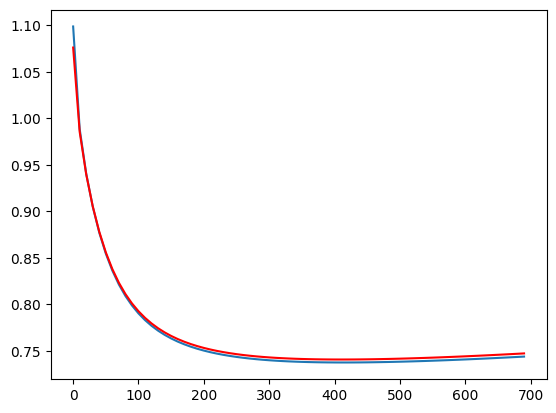

In [23]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_train_data)

train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])

cols = ['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'UBOT', 'PRECT', 'QREFHT', "Label"] 

train_df = train_df[cols]

np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_df.to_numpy(), test_size=0.5 #, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=700, regularizer=0.1)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

plt.plot(
    model.iters,
    model.train_errors
)

plt.plot(
    model.iters,
    model.valid_errors,
    color='r'
)

### Training model

---

In [25]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_test_data)

test_df, test_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"], is_test=True)

test_data = test_df[['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500', 'UBOT', 'PRECT', 'QREFHT']].to_numpy()

test_data = preproc.normalize_data(test_data)

y_pred_test = model.predict(X=test_data)

In [26]:
submition = raw_data['SNo'].reset_index().copy()
submition['Label'] = pd.Series(y_pred_test)
submition.drop("index", axis=1, inplace=True)
submition.to_csv(f"predictions_{datetime.now()}.csv", index=False)